# STA2453 Lab 1

## Instructions

### Due Date:  September 24, 9:30

Complete all the exercises from class 1 in this notebook.  Explanations should be appear in markdown cells and code with output should in code cells.  You may use either R or Python. 

__Name:__ <mark> Jerry Zikun Chen </mark>

__Student Number:__ <mark> 1001117882 </mark>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
leuk_data = pd.read_csv('https://web.stanford.edu/~hastie/CASI_files/DATA/leukemia_big.csv')
sns.set()

# Exercise 1
Create the histogram and boxplots above using R or Python. Interpret each plot. Which plot do you prefer to compare the distributions? Why?

Is there a difference in gene 48 between patients with ALL (acute lymphoblastic leukemia) compared to AML (acute myeloid leukemia, a worse prognosis)?

Text(0, 0.5, 'count')

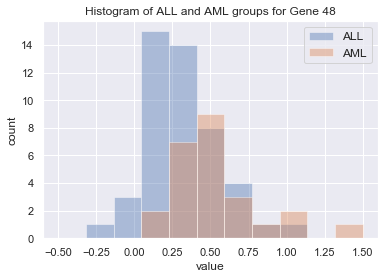

In [3]:
# Histogram
num_bins = 11
x_range = [-0.5, 1.5]
ALL_data = leuk_data.filter(regex='^ALL', axis=1).loc[47]
AML_data = leuk_data.filter(regex='^AML', axis=1).loc[47]
sns.distplot(ALL_data, bins = num_bins, kde=False, label='ALL', hist_kws={"range": x_range})
sns.distplot(AML_data, bins = num_bins, kde=False, label='AML', hist_kws={"range": x_range})

# plot formatting
plt.legend(prop={'size': 12})
plt.title('Histogram of ALL and AML groups for Gene 48')
plt.xlabel('value')
plt.ylabel('count')

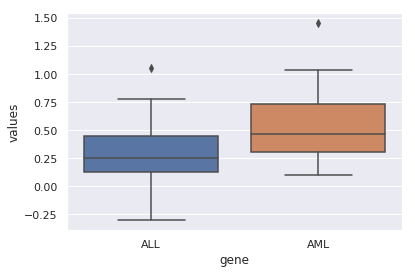

In [12]:
# Boxplot
ALL_df = ALL_data.to_frame()
ALL_df.reset_index(inplace = True, drop=True) 
ALL_df['gene']='ALL'

AML_df = AML_data.to_frame()
AML_df.reset_index(inplace = True, drop=True) 
AML_df['gene']='AML'

fourtyeight_df = pd.concat([ALL_df, AML_df])
fourtyeight_df.rename(columns={47:'values'}, inplace=True)

sns.boxplot(data=fourtyeight_df, x='gene', y='values')

## Explanation

Using which plot depends on the nature of the sample distribution and for what purpose. One example of histogram being the better choice is when the data is bimodal or trimodal. If we plot the same data on a boxplot, we cannot see the peaks that is hidden in the data distribution. A boxplot is a better choice when we are more focused on the quartiles and outliers of the distribution. It might be the case that the data is distributed very densely around its mean on a histogram, making it hard to tell whether the distribution is skewed. Furthermore, in terms of who is looking at the plots, histograms are more straightforward when presented to a non-technical audience who do not understand what quartiles are.

By observing the plots, we can tell that there is a difference in gene 48 between patients with ALL compared to AML. ALL group has a smaller centre of its distribution and a smaller variance around the mean.

# Exercise 2

Use R or Python to calculate a p-value for a test comparing the two groups. Interpret the p-value.

This is one candidate gene out of 7,128 genes. Is t = -3.30 unusual?

In [13]:
# two sample t-test for gene 48
g1 = fourtyeight_df[fourtyeight_df['gene']=='ALL']['values']
g2 = fourtyeight_df[fourtyeight_df['gene']=='AML']['values']

t48 = stats.ttest_ind(g1, g2).statistic
stats.ttest_ind(g1, g2)

Ttest_indResult(statistic=-3.304723060985416, pvalue=0.0015010850334556379)

## Explanation

We see from the t-test result that the t statistic is -3.30 and the p-value is 0.0015, which is smaller than 0.05. We might want to conclude based on the p-value that there is a statiscally significant difference between the ALL group and AML group for gene 48. However, considering the fact that there are in total 7128 different candidate genes within the dataset, the chance of getting a significant p-value for some gene expressions could be high even if there is no real difference. 

# Exercise 3

Create the histogram above using R or Python. Write a few sentences describing how the histogram above was generated. Is gene48 unusual compared to other genes?

In [14]:
# add code for exercise 3 here
m = len(leuk_data)

# allocate space for empty array
t_stat_array = [None]*m

for i in range(m):
    
    ALL_data = leuk_data.filter(regex='^ALL', axis=1).loc[i]
    AML_data = leuk_data.filter(regex='^AML', axis=1).loc[i]
    
    g1 = ALL_data.values
    g2 = AML_data.values
    
    t_stat = stats.ttest_ind(g1, g2).statistic
    t_stat_array[i] = t_stat

In [15]:
# proportion of t values smaller than t value of gene 48 
t_stat_array = np.array(t_stat_array)
t_extremes = t_stat_array[t_stat_array < t48]
len(t_extremes)/m

0.0484006734006734

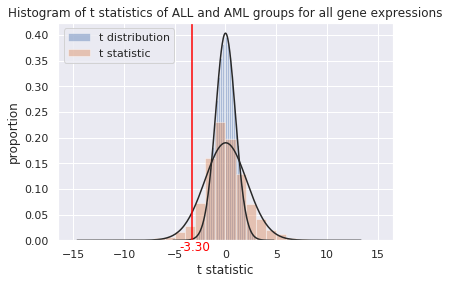

In [16]:
# Plot Histogram of t statistics
deg_free = len(leuk_data.columns) - 2

# t distribution with 70 degree of freedom
class FixedT(stats.distributions.t_gen):
    def fit(self, *args, **kwargs):
        return stats.t.fit(*args, fix_df=deg_free, **kwargs)

# t distribution
x = np.random.randn(1000000)
sns.distplot(x, kde=False, fit=FixedT(), label="t distribution")
# t statistics calculated from above
sns.distplot(t_stat_array, bins = 30, kde=False, hist_kws={"range": [-15,15]}, fit=FixedT(), label="t statistic")

# formatting
plt.title('Histogram of t statistics of ALL and AML groups for all gene expressions')
plt.xlabel('t statistic')
plt.ylabel('proportion')
plt.axvline(t48, 0, 1, color='red')
plt.text(-4.5, -0.02, '-3.30', color='red')
plt.legend(loc='upper left')


## Explanation

The data for the above plot is generated using a for loop that iterates over each expression of patients' gene data, and computes the two-sample t statistic from ALL and AML groups values of that particular expression. We than collect these t statistics together and plot a histogram of their values. Finally, we impose a t distribution curve with degree of freedom 70 in the same graph and highlight the value -3.30 of gene 48. Note that in the above graph the y-axis has proportions instead of values. This is because the histagram has been normalized in order for the t distribution to have the same proportion in the plot.

Gene 48 now looks less unusual compared to Exercise 2 because 4.84% of the t-values from other gene expressions are even smaller than -3.30. We assumed in the null hypothesis that the two-sample t statistic follows a t distribution with 70 degrees of freedom. This assumption is probably wrong since it is too dense around the mean for the data distribution. This can cause insignificant t values to be significant around the tails, which is what we have observed in Exercise 2 (p-value = 0.0015). The actual data distribution in orange has much fatter tails on both ends.

# Exercise 4

During a period two years which hospital is more likely to have more than 60% boys born? Use R or Python to create similar histograms that show the distributions of boys in a large and small hospital.

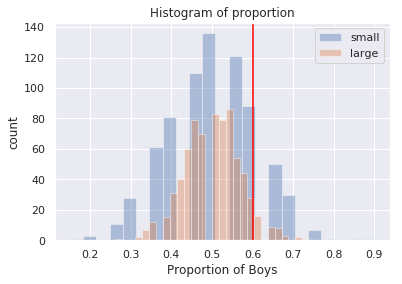

In [17]:
# Histograms
days = 365*2
np.random.seed(941)
a = np.random.binomial(20, 0.5, size=days)/20
b = np.random.binomial(50, 0.5, size=days)/50
sns.distplot(a, kde=False, label="small")
sns.distplot(b, kde=False, label="large")

plt.axvline(0.6, 0, 1, color='red')
plt.title('Histogram of proportion')
plt.xlabel('Proportion of Boys')
plt.ylabel('count')
plt.legend()

In [18]:
# Small hospital's proportion of 60% boys born in 2 years
len(a[a>0.6])/days

0.1232876712328767

In [19]:
# Large hospital's proportion of 60% boys born in 2 years
len(b[b>0.6])/days

0.05342465753424658

## Explanation

As we can see, the smaller hospital is more likely to have more than 60% boys born during the two year period. We let each birth be a Bernoulli random variable with probability of boy born be $p = 0.5$. The proportion of boys is the sample mean of the distribution, which converges to $N(p, \frac{p(1-p)}{n})$ by the central limit theorem. As we can see, in the asymptotic normal distribution, the proportion of boys in the small hospital has a larger variance since n is smaller. This means a greater chance of extreme values over 0.6.

# Exercise 5

Use R or Python to create the permutation distribution. Calculate the two-sided P-value? Briefly interpret the two-sided P-value.

In [20]:
# mean difference of gene 48 in the original data
gene48_array = leuk_data.loc[47].values
cutoff = 47

ALL_data = leuk_data.filter(regex='^ALL', axis=1).loc[47]
AML_data = leuk_data.filter(regex='^AML', axis=1).loc[47]

m1 = ALL_data.mean()
m2 = AML_data.mean()

mean_diff_48 = m1 - m2
mean_diff_48

-0.2269164104263829

In [21]:
# take line 47 out
N = 10000
mean_diff_array = [None]*N
gene48_array = leuk_data.loc[47].values
ordered_indices = np.arange(len(leuk_data.columns))
cutoff = 47

for i in range(N):
    # set seed for reproducibility
    np.random.seed(i)
    # permute indices
    indices = np.random.permutation(ordered_indices)
    perm = gene48_array[indices]
    m1 = perm[:cutoff].mean()
    m2 = perm[cutoff:].mean()
    diff = m1-m2
    mean_diff_array[i] = diff


Text(0, 0.5, 'count')

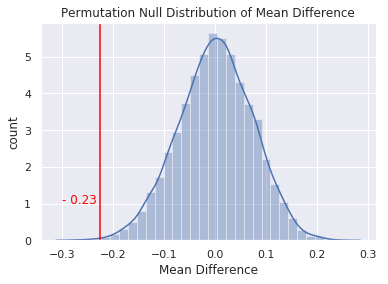

In [22]:
# Plot Histogram
sns.distplot(mean_diff_array, bins = 30)

plt.axvline(mean_diff_48, 0, 1, color='red')
plt.text(-0.3, 1, '- 0.23', color='red')
plt.title('Permutation Null Distribution of Mean Difference')
plt.xlabel('Mean Difference')
plt.ylabel('count')

In [23]:
# Calculate two-side p-value of above distribution
mean_diff_array = np.array(mean_diff_array)
num_extreme_neg = len(mean_diff_array[mean_diff_array < mean_diff_48])
num_extreme_pos = len(mean_diff_array[mean_diff_array > -mean_diff_48])
p_value = (num_extreme_neg + num_extreme_pos) / len(mean_diff_array)
p_value

0.0015

## Explanation

As we can see, the two-sided p-value is 0.0015, which is statistically significant. As stated in the book CASI, this means that "the actual division of AML and ALL measurements were not random, but rather resulted from negation of the null hypothesis". Under null hypothesis, we are allowed to permute the gene expression values for ALL and AML groups. The observed difference value -0.23 lies in the two-tailed 5% critical regions. There are only 0.15% chance of seeing this value on both sides of the extreme if there are no difference in ALL and AML groups. Therefore, it is safe to reject the null hypothesis and conclude that there is difference in the gene 48 expressions between the two groups.